## 2. Camera Calibration

In [1]:
import numpy as np
import glob
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

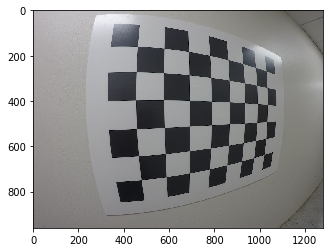

In [2]:
path = './images/GOPR0032.jpg'
img = imread(path)
plt.imshow(img)

In [3]:
# Map 2D Coordinates of Image to 3D coordinates on Chessboard
# 3-D Points in real world
# (x,y,0)
objpoints = []

# 2-D points in the image
# (x,y)
imgpoints = []

In [4]:
# Create Object Points
# Since, cols = 8, rows = 6 in chessboard image
objp = np.zeros(shape=(6 * 8,3), dtype=np.float32)

In [5]:
objp.shape

(48, 3)

In [6]:
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

In [7]:
objp[:,:2]

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 4.,  0.],
       [ 5.,  0.],
       [ 6.,  0.],
       [ 7.,  0.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 0.,  2.],
       [ 1.,  2.],
       [ 2.,  2.],
       [ 3.,  2.],
       [ 4.,  2.],
       [ 5.,  2.],
       [ 6.,  2.],
       [ 7.,  2.],
       [ 0.,  3.],
       [ 1.,  3.],
       [ 2.,  3.],
       [ 3.,  3.],
       [ 4.,  3.],
       [ 5.,  3.],
       [ 6.,  3.],
       [ 7.,  3.],
       [ 0.,  4.],
       [ 1.,  4.],
       [ 2.,  4.],
       [ 3.,  4.],
       [ 4.,  4.],
       [ 5.,  4.],
       [ 6.,  4.],
       [ 7.,  4.],
       [ 0.,  5.],
       [ 1.,  5.],
       [ 2.,  5.],
       [ 3.,  5.],
       [ 4.,  5.],
       [ 5.,  5.],
       [ 6.,  5.],
       [ 7.,  5.]], dtype=float32)

In [8]:
# Detect Corners of Chessboard
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

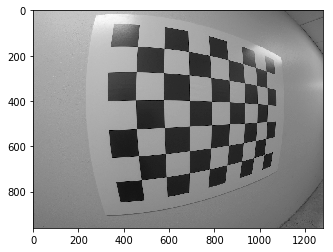

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
# Find Corners in Image
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

In [11]:
print(ret)

True


In [12]:
print(corners)

[[[  462.55410767   161.35435486]]

 [[  579.88311768   169.6920929 ]]

 [[  687.88757324   184.07696533]]

 [[  782.25793457   201.73709106]]

 [[  862.12164307   220.18530273]]

 [[  928.70050049   238.08647156]]

 [[  984.37243652   254.65420532]]

 [[ 1030.18383789   270.08410645]]

 [[  456.55410767   274.14923096]]

 [[  578.6138916    278.18322754]]

 [[  690.15869141   287.34585571]]

 [[  786.54882812   298.59094238]]

 [[  867.05114746   310.93096924]]

 [[  934.02606201   322.46456909]]

 [[  989.14910889   333.13928223]]

 [[ 1035.05688477   343.04867554]]

 [[  454.80761719   397.90130615]]

 [[  578.56011963   396.98193359]]

 [[  691.44372559   399.01077271]]

 [[  788.14324951   402.4329834 ]]

 [[  869.05474854   406.35153198]]

 [[  935.9753418    410.45928955]]

 [[  991.04345703   414.30935669]]

 [[ 1036.21105957   418.09844971]]

 [[  458.96588135   524.4944458 ]]

 [[  580.934021     518.83203125]]

 [[  692.22259521   512.9375    ]]

 [[  788.00091553   507.7608

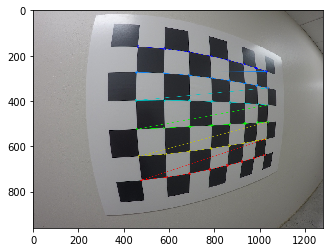

In [13]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)

In [14]:
path = './images/*.jpg'
images = glob.glob(path)

In [15]:
images

['./images\\GOPR0032.jpg',
 './images\\GOPR0033.jpg',
 './images\\GOPR0034.jpg',
 './images\\GOPR0035.jpg',
 './images\\GOPR0036.jpg',
 './images\\GOPR0037.jpg',
 './images\\GOPR0038.jpg',
 './images\\GOPR0040.jpg',
 './images\\GOPR0041.jpg',
 './images\\GOPR0042.jpg',
 './images\\GOPR0043.jpg',
 './images\\GOPR0044.jpg',
 './images\\GOPR0045.jpg',
 './images\\GOPR0046.jpg',
 './images\\GOPR0047.jpg',
 './images\\GOPR0048.jpg',
 './images\\GOPR0049.jpg',
 './images\\GOPR0050.jpg',
 './images\\GOPR0051.jpg',
 './images\\GOPR0052.jpg',
 './images\\GOPR0053.jpg',
 './images\\GOPR0054.jpg',
 './images\\GOPR0055.jpg',
 './images\\GOPR0057.jpg',
 './images\\GOPR0058.jpg',
 './images\\GOPR0059.jpg',
 './images\\GOPR0060.jpg',
 './images\\GOPR0061.jpg',
 './images\\GOPR0062.jpg',
 './images\\GOPR0063.jpg',
 './images\\GOPR0064.jpg',
 './images\\GOPR0066.jpg',
 './images\\GOPR0067.jpg',
 './images\\GOPR0068.jpg',
 './images\\GOPR0069.jpg',
 './images\\GOPR0070.jpg']

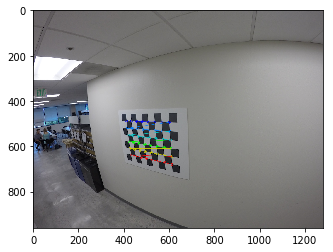

In [16]:
for fname in images:
    img = imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)
    

In [17]:
# Caliberate Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [18]:
ret

0.558092471706563

In [19]:
mtx

array([[ 560.53772378,    0.        ,  651.30155743],
       [   0.        ,  561.55848731,  499.23463591],
       [   0.        ,    0.        ,    1.        ]])

In [20]:
dist

array([[ -2.33084194e-01,   6.17717059e-02,  -7.27061158e-05,
          4.11542830e-05,  -7.55927999e-03]])

In [21]:
# Rotation Vector
rvecs

[array([[ 0.09316158],
        [-0.32478449],
        [-0.02495639]]), array([[ 0.09316158],
        [-0.32478449],
        [-0.02495639]]), array([[ 0.11259055],
        [-0.18680625],
        [-0.03807366]]), array([[ 0.05198983],
        [ 0.02649629],
        [-0.01112425]]), array([[ 0.14095649],
        [-0.0392506 ],
        [ 0.00323939]]), array([[ 0.089224  ],
        [ 0.28762521],
        [ 0.00597308]]), array([[ 0.14846102],
        [ 0.1912892 ],
        [ 0.03753425]]), array([[ 0.29569211],
        [-0.39725429],
        [-0.20164261]]), array([[ 0.45396839],
        [-0.05709677],
        [-0.01007044]]), array([[ 0.34148428],
        [-0.02722491],
        [-0.01566102]]), array([[ 0.11155199],
        [-0.05252726],
        [-0.01678054]]), array([[ 0.15582979],
        [-0.33474287],
        [-0.0561316 ]]), array([[ 0.08909529],
        [-0.10638262],
        [-0.05940365]]), array([[ 0.10877932],
        [-0.04847109],
        [ 0.02249911]]), array([[ 0.29224313

In [22]:
# Camera Translation Vector
tvecs

[array([[-1.56182393],
        [-2.78684801],
        [ 4.06404546]]), array([[-1.56182393],
        [-2.78684801],
        [ 4.06404546]]), array([[-2.10115241],
        [-2.81760875],
        [ 5.97424561]]), array([[-3.501365  ],
        [-2.74888723],
        [ 3.71761231]]), array([[-3.42973465],
        [-2.17591556],
        [ 3.44309327]]), array([[-4.02845524],
        [-2.47254072],
        [ 4.57041248]]), array([[-4.57152725],
        [-1.98939334],
        [ 4.41119476]]), array([[-2.26271983],
        [-1.46045589],
        [ 2.56498671]]), array([[-3.1261459 ],
        [-0.99674898],
        [ 2.71119899]]), array([[-3.05881581],
        [-1.41335319],
        [ 2.69257113]]), array([[-3.59957308],
        [-2.69728229],
        [ 7.04576065]]), array([[-0.81968891],
        [-2.90233328],
        [ 7.39447426]]), array([[ 1.73422461],
        [-2.5566571 ],
        [ 5.17357802]]), array([[-6.36229241],
        [-2.36589786],
        [ 4.3827962 ]]), array([[-4.86093762

In [23]:
def cal_undistort(grayimg, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    #undist = np.copy(img)  # Delete this line
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, grayimg.shape[::-1], None, None)
    dest = cv2.undistort(img, mtx, dist, None, mtx)
    return dest

In [24]:
dest = cal_undistort(gray, objpoints, imgpoints)

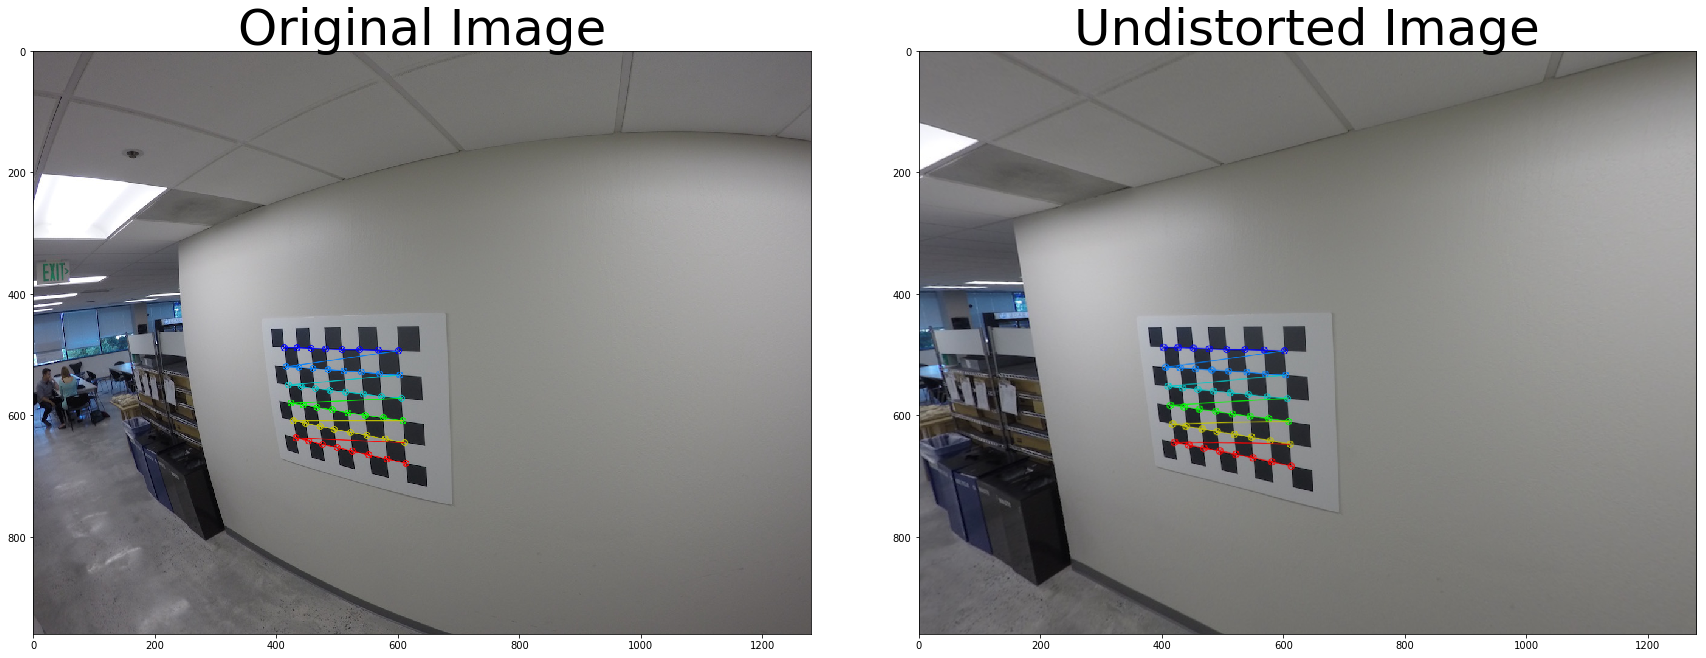

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dest, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [26]:
dest.shape

(960, 1280, 3)

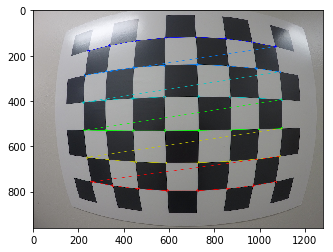

In [27]:
imagepoints = []
objectpoints = []

img = imread('./images/GOPR0034.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    
if ret == True:
    imagepoints.append(corners)
    objectpoints.append(objp)
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)

In [28]:
dest = cal_undistort(gray, objectpoints, imagepoints)

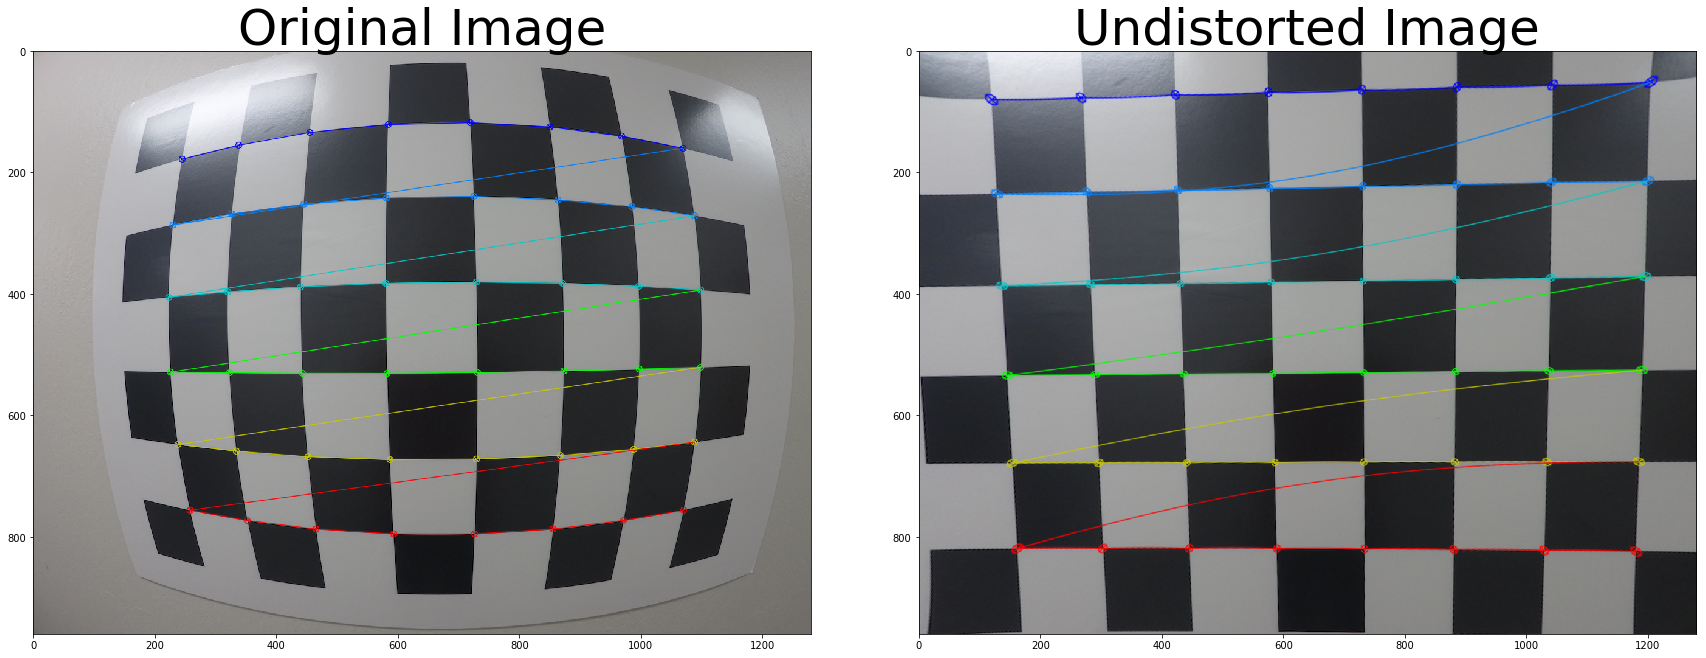

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dest, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)